In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import gen_features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [61]:
df = pd.read_csv("day.csv")

In [62]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [64]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [65]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [66]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Унікальні значення для стовбця "{column}": {unique_values}')

Унікальні значення для стовбця "instant": [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 

Булеві - yr, holiday, workingday
Категоріальні - season, weekday, weathersit

In [67]:
# Функція для проведення тесту Діккі-Фуллера
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')

# Аналіз стаціонарності для загальної кількості registered
adf_test(df['registered'])


ADF Statistic: -1.8510673314876487
p-value: 0.3554187954361645
Critical Value (1%): -3.439593802573824
Critical Value (5%): -2.865619356068967
Critical Value (10%): -2.568942332870462


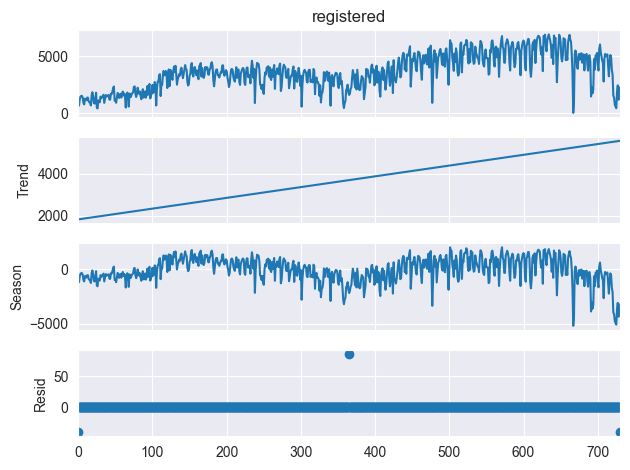

In [68]:
# Декомпозиція часового ряду
decompose_result = STL(df['registered'], period=365).fit()

# Візуалізація результатів декомпозиції
decompose_result.plot()
plt.show()


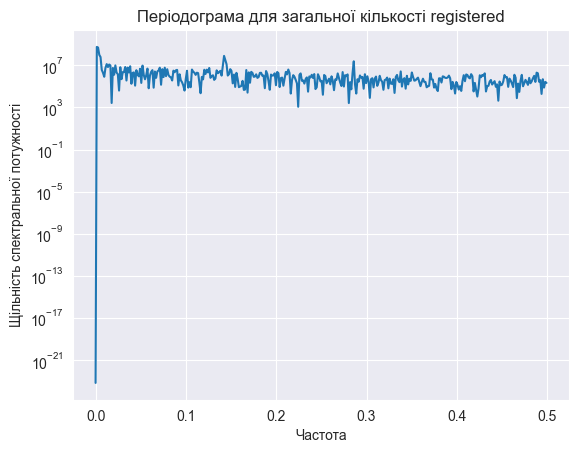

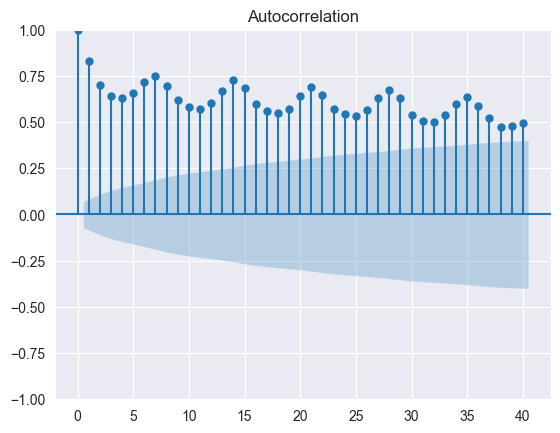

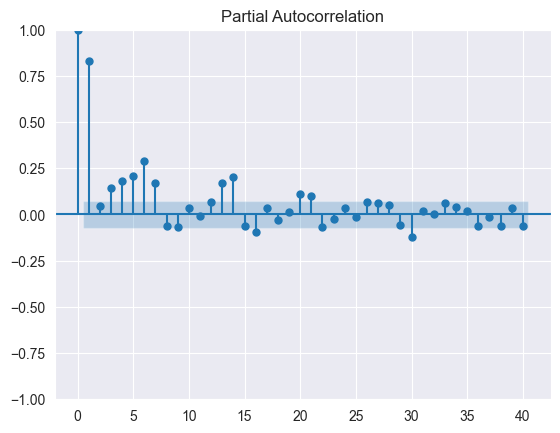

In [69]:
# Періодограма
f, Pxx_den = signal.periodogram(df['registered'])
plt.semilogy(f, Pxx_den)
plt.title('Періодограма для загальної кількості registered')
plt.xlabel('Частота')
plt.ylabel('Щільність спектральної потужності')
plt.show()

# ACF та PACF для аналізу лагів
plot_acf(df['registered'], lags=40)
plot_pacf(df['registered'], lags=40)
plt.show()


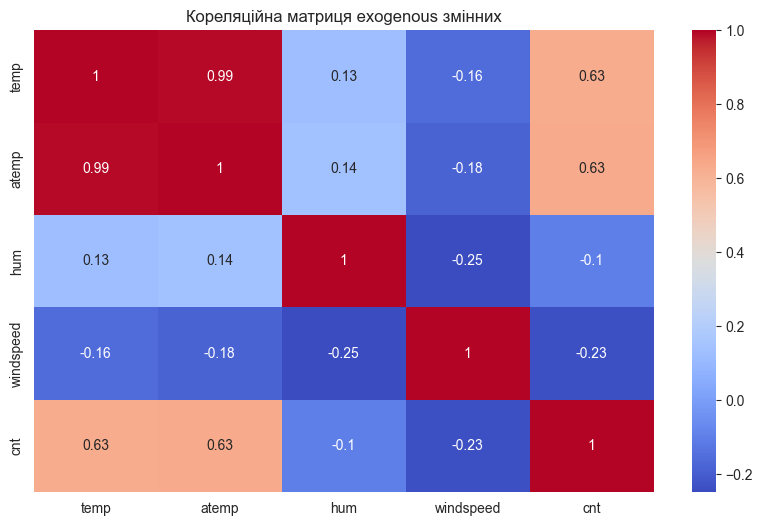

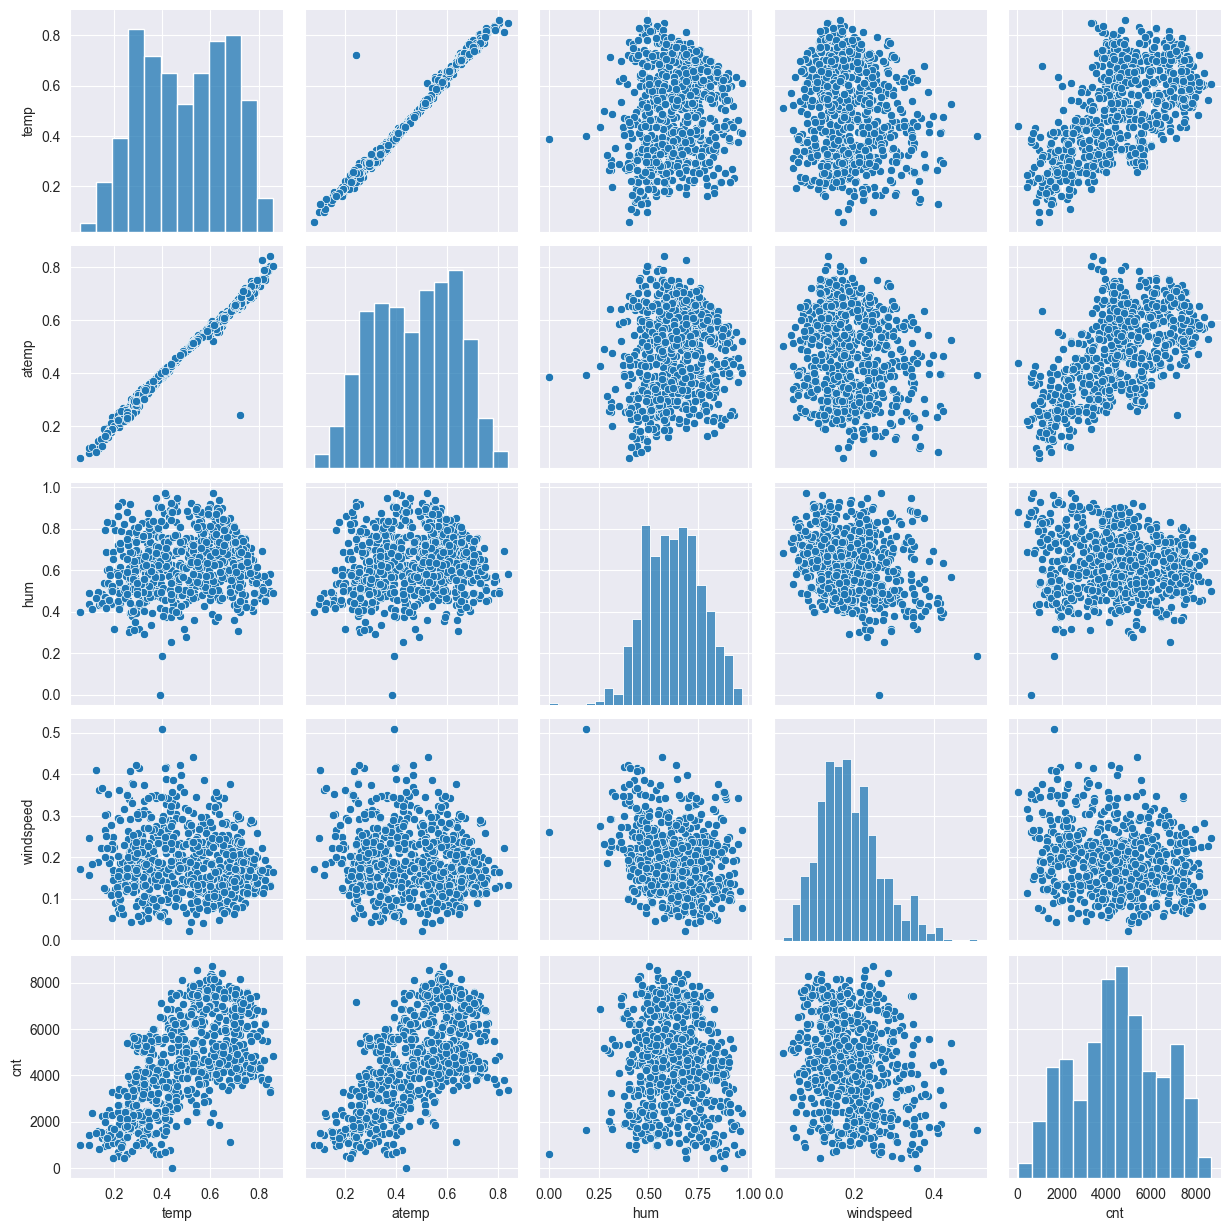

In [70]:
# Кореляційна матриця
corr_matrix = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

# Візуалізація кореляційної матриці
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Кореляційна матриця exogenous змінних')
plt.show()

# Візуалізація зв'язків exogenous змінних із кількістю оренд
sns.pairplot(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()


In [71]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [72]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [73]:
df['day_of_month'] = df['dteday'].dt.day
df = df.drop('dteday', axis=1)

In [74]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_month
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5


In [75]:
X = df.drop(['registered'], axis=1)
y = df['registered']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# numeric_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'cnt']
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season', 'mnth', 'weekday', 'weathersit', 'day_of_month']
bool_features = ['yr', 'workingday', 'holiday', 'casual', 'cnt', 'instant']
all_features = bool_features + categorical_features

numerical_features = gen_features(
    columns=[[col] for col in numeric_features],
    classes=[
        {'class': StandardScaler}
    ]
)

categorical_transformations = gen_features(
    columns=[[col] for col in categorical_features],
    classes=[OneHotEncoder]
)
bool_features_trans = gen_features(
    columns=[[col] for col in all_features]
)

mapper = DataFrameMapper(
  numerical_features + categorical_transformations + bool_features_trans, df_out= True, default=False)

X_train_prepr = mapper.fit_transform(X_train)
X_test_prepr = mapper.transform(X_test)

G:\Ilya\TML\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function tosequence is deprecated; tosequence was deprecated in 1.5 and will be removed in 1.7
  warnings.warn(msg, category=FutureWarning)


In [76]:
X_train_prepr

,temp,atemp,hum,windspeed,season_0,season_1,season_2,season_3,mnth_0,mnth_1,...,workingday,holiday,casual,cnt,instant,season,mnth,weekday,weathersit,day_of_month
682,-0.864610,-0.961525,0.223424,1.957045,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,327,4094,683,4,11,2,2,13
250,0.737288,0.475581,2.171018,0.026719,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,153,1842,251,3,9,4,3,8
336,-1.108087,-1.039659,-0.128574,-1.226972,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,706,3614,337,4,12,6,1,3
260,0.040404,0.074269,0.449288,-0.157718,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,1353,4274,261,3,9,0,1,18
543,1.087829,1.004466,-1.909102,1.048487,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0,1077,7335,544,3,6,3,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.638504,-0.609479,-0.730675,1.033346,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,982,2417,72,1,3,0,1,13
106,-0.239827,-0.203333,-1.067242,1.458618,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1558,3744,107,2,4,0,1,17
270,0.743281,0.598140,1.531683,-0.543711,0.0,0.0,0.0,1.0,0.0,0.0,...,1,0,480,3907,271,4,9,3,2,28
435,-0.763142,-0.735902,-1.085728,0.412518,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1658,4911,436,1,3,0,1,11


# Використовуючи класичні моделі чи ансамблі ML на вибір студента

Побудувати лінійну (чи поліноміальну) модель для тренду, провести декомпозицію, провести детрендинг та десезонинацію, побудувати основну модель для передбачення очищеного часового ряду (з exogenous та endogenous змінним);


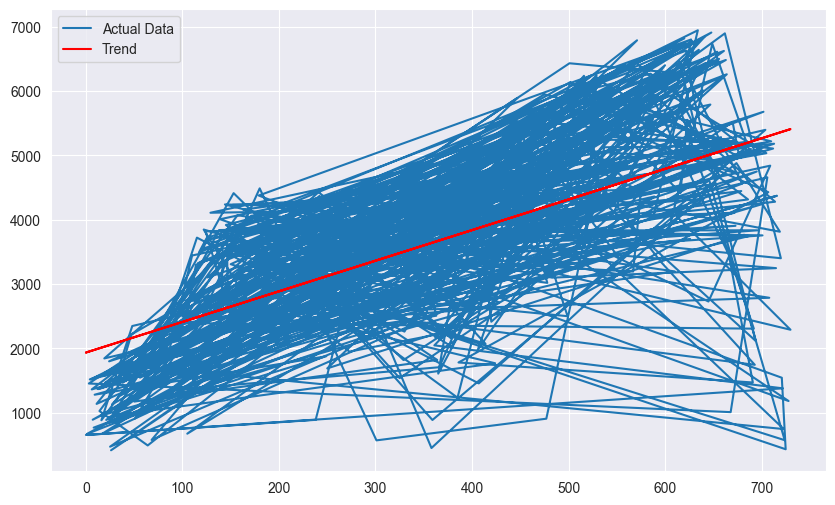

In [77]:

# Лінійна модель тренду
trend_model = LinearRegression()
trend_model.fit(X_train_prepr[['instant']], y_train)

# Прогноз тренду
trend_predictions = trend_model.predict(X_train_prepr[['instant']])

# Візуалізація тренду
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train, label='Actual Data')
plt.plot(y_train.index, trend_predictions, label='Trend', color='red')
plt.legend()
plt.show()

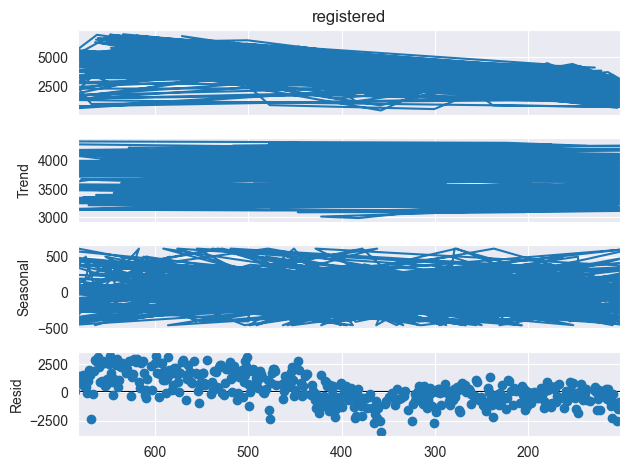

In [78]:
# Декомпозиція часового ряду
decomposition = seasonal_decompose(y_train, model='additive', period=30)

# Візуалізація компонент
decomposition.plot()
plt.show()

# Виділяємо компоненти: тренд, сезонність і залишки
trend_component = decomposition.trend
seasonal_component = decomposition.seasonal
residual_component = decomposition.resid

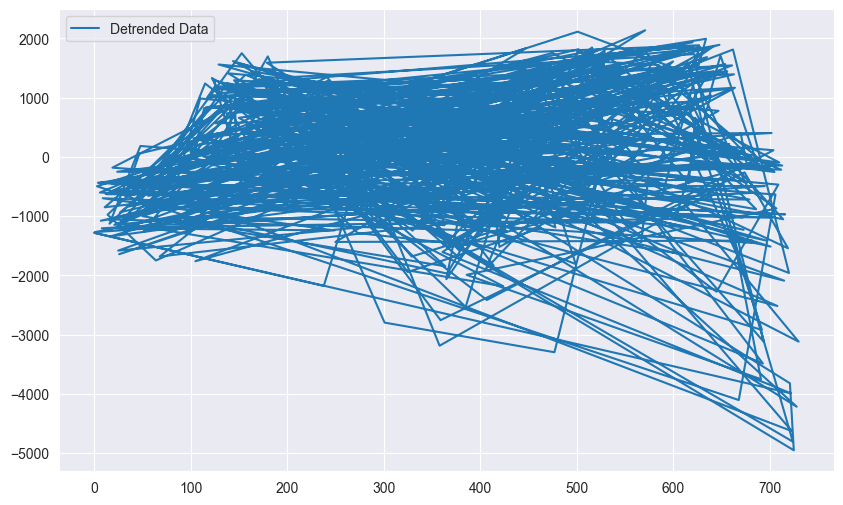

In [79]:
# Детрендинг
detrended_data = y_train - trend_predictions

# Візуалізація детрендованих даних
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, detrended_data, label='Detrended Data')
plt.legend()
plt.show()


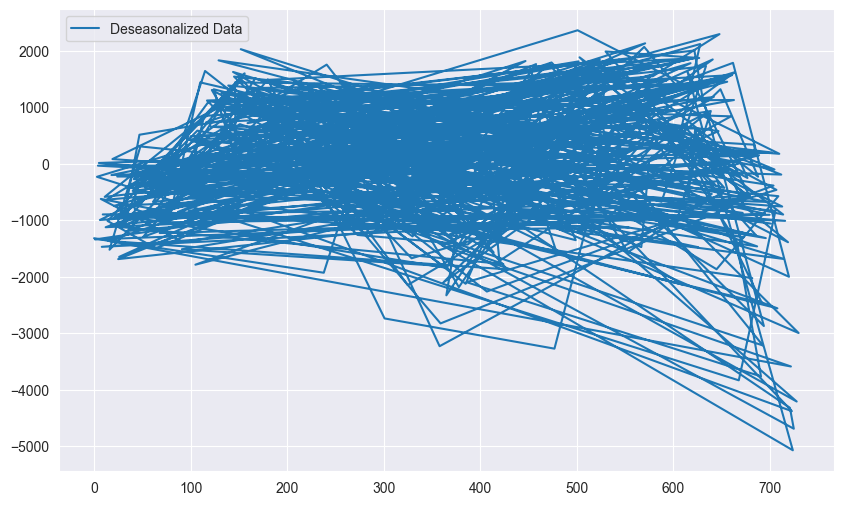

In [80]:
# Десезоналізація
deseasonalized_data = detrended_data - seasonal_component

# Візуалізація десезоналізованих даних
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, deseasonalized_data, label='Deseasonalized Data')
plt.legend()
plt.show()


Провести лише десезонинацію, та побудувати модель для передбачення очищеного рядку.

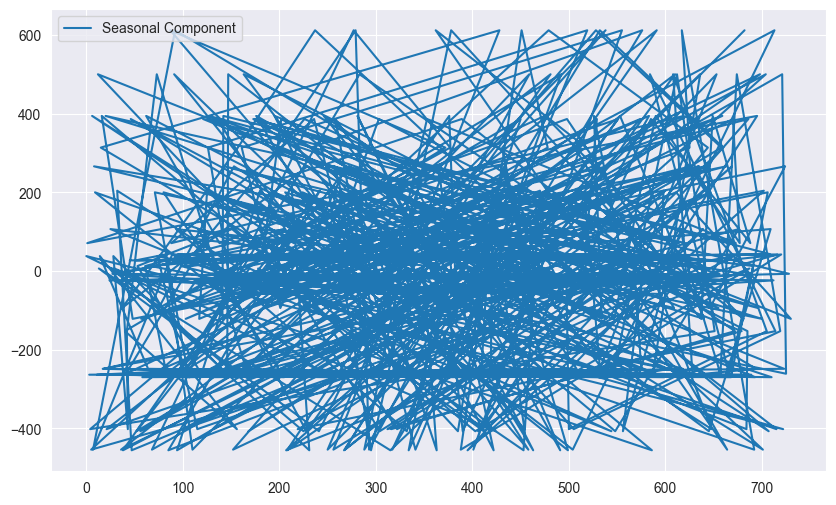

In [81]:
# Декомпозиція ряду для виділення сезонної компоненти
decomposition = seasonal_decompose(y_train, model='additive', period=30)

# Виділяємо сезонну компоненту
seasonal_component = decomposition.seasonal

# Візуалізація сезонної компоненти
plt.figure(figsize=(10, 6))
plt.plot(seasonal_component.index, seasonal_component, label='Seasonal Component')
plt.legend()
plt.show()

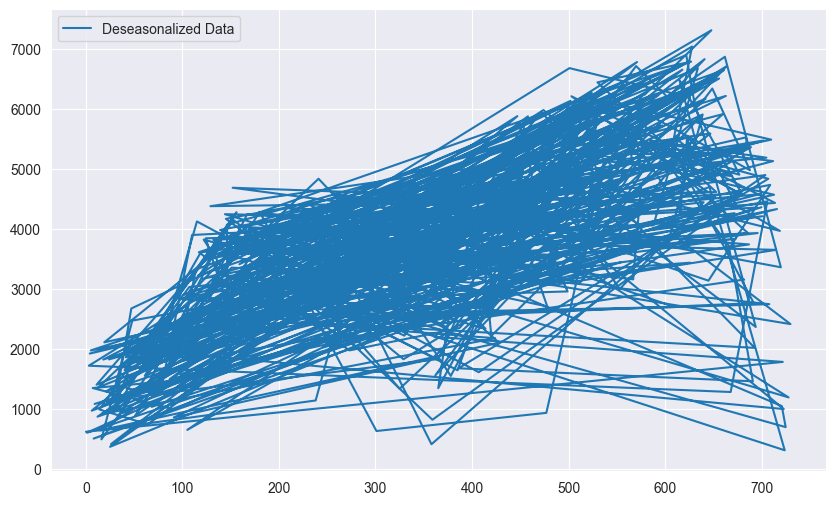

In [82]:
# Десезоналізація: очищення ряду від сезонності
deseasonalized_data = y_train - seasonal_component

# Візуалізація десезоналізованих даних
plt.figure(figsize=(10, 6))
plt.plot(deseasonalized_data.index, deseasonalized_data, label='Deseasonalized Data')
plt.legend()
plt.show()

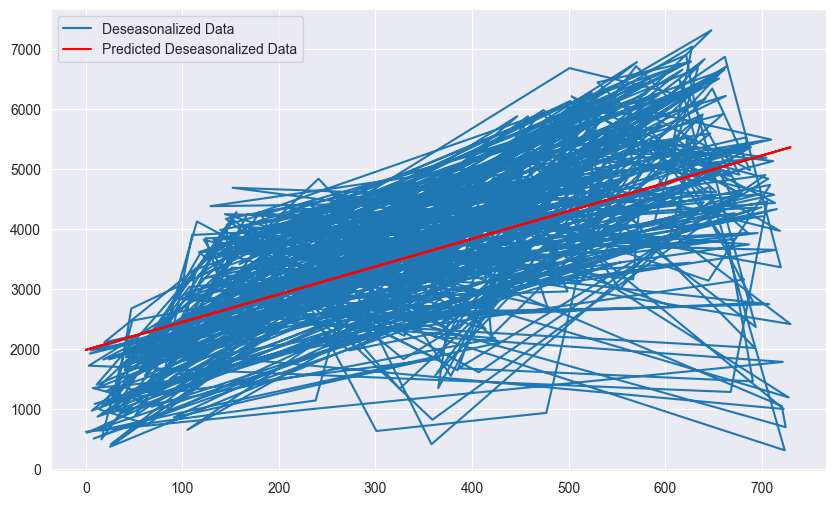

In [83]:
# Лінійна модель для передбачення очищеного ряду
cleaned_model = LinearRegression()
cleaned_model.fit(X_train_prepr[['instant']], deseasonalized_data)

# Прогноз очищеного ряду
cleaned_predictions = cleaned_model.predict(X_train_prepr[['instant']])

# Візуалізація прогнозу очищеного ряду
plt.figure(figsize=(10, 6))
plt.plot(deseasonalized_data.index, deseasonalized_data, label='Deseasonalized Data')
plt.plot(deseasonalized_data.index, cleaned_predictions, label='Predicted Deseasonalized Data', color='red')
plt.legend()
plt.show()


# STL декомпозиція часового ряду

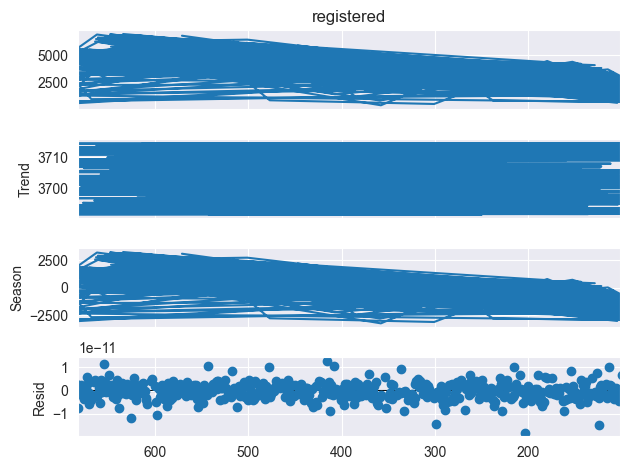

In [84]:
stl = STL(y_train, period=365)
result = stl.fit()

result.plot()
plt.show()

Детрендинг і десезонізація

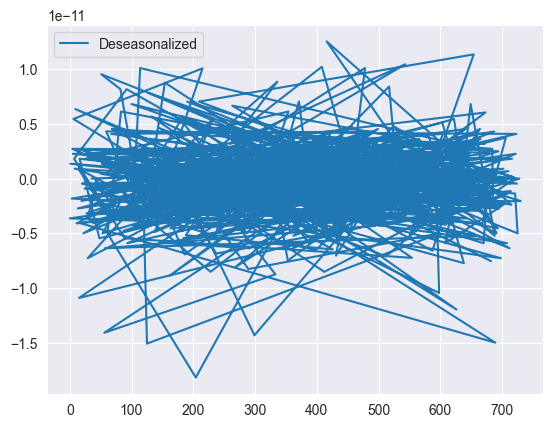

In [85]:

detrended = y_train - result.trend

deseasonalized = detrended - result.seasonal

plt.plot(deseasonalized, label="Deseasonalized")
plt.legend()
plt.show()


Mean Squared Error (Лінійна модель на очищених даних): 15058837.680272108


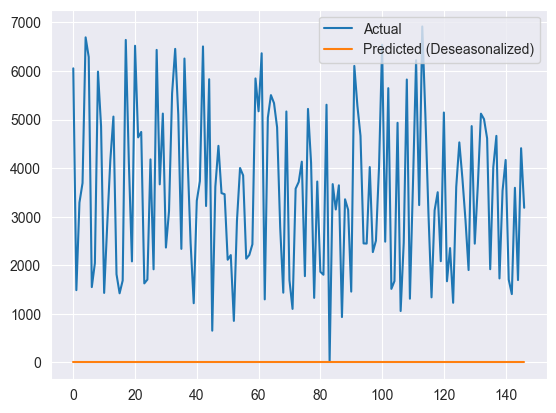

In [86]:
# Створюємо та тренуємо лінійну модель для очищеного ряду
linear_model = LinearRegression()
linear_model.fit(X_train_prepr, deseasonalized)

# Прогнозування на тестовій вибірці
y_pred_trend = linear_model.predict(X_test_prepr)

# Оцінка якості моделі
mse_trend = mean_squared_error(y_test, y_pred_trend)
print(f"Mean Squared Error (Лінійна модель на очищених даних): {mse_trend}")

# Візуалізація результатів
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_trend, label='Predicted (Deseasonalized)')
plt.legend()
plt.show()

# SARIMAX 

In [87]:
# Очищені дані після десезоналізації
y_cleaned = deseasonalized_data

# Exogenous змінні, якщо потрібно (наприклад, температура, вологість тощо)
X_exog = X_train_prepr[['temp', 'windspeed']]  # або інші змінні


In [88]:
from pmdarima import auto_arima

# Підбір параметрів ARIMA
auto_model = auto_arima(y_cleaned, exogenous=X_exog, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
print(auto_model.summary())


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# Параметри з auto_arima або вручну (наприклад, p=2, d=1, q=2 для ARIMA і P=1, D=1, Q=1, S=12 для SARIMA)
model = SARIMAX(y_cleaned, exog=X_exog, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
sarimax_result = model.fit(disp=False)

# Прогноз
n_periods = 30  # кількість періодів для прогнозу
forecast = sarimax_result.get_forecast(steps=n_periods, exog=X_exog[-n_periods:])

# Візуалізація прогнозу
forecast_index = np.arange(len(y_cleaned), len(y_cleaned) + n_periods)
forecast_values = forecast.predicted_mean

plt.figure(figsize=(10, 6))
plt.plot(y_cleaned.index, y_cleaned, label='Historical Data')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.legend()
plt.show()


In [ ]:
# Оцінка помилки на навчальній вибірці
train_pred = sarimax_result.fittedvalues
mse_train = mean_squared_error(y_cleaned, train_pred)
print(f'Train MSE: {mse_train}')
